<a href="https://colab.research.google.com/github/KrishChothani/AI_ML/blob/main/ML_PRACT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
data = pd.read_csv(r'BostonHousing.csv')
data


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
x = data['age'].values
y = data['medv'].values


In [ ]:

n = len(x)
n

506

In [ ]:
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)


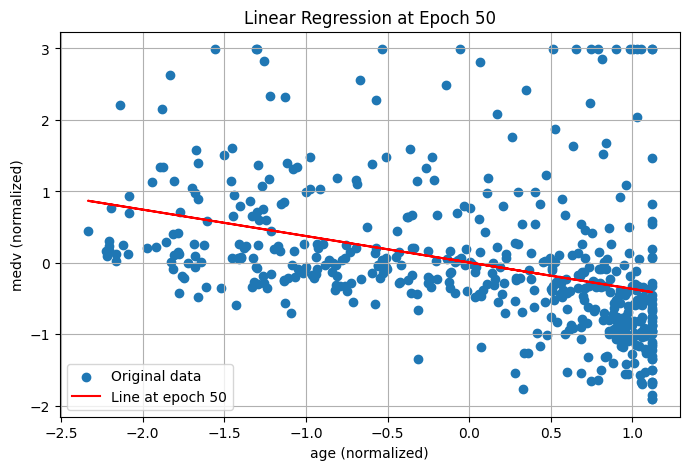

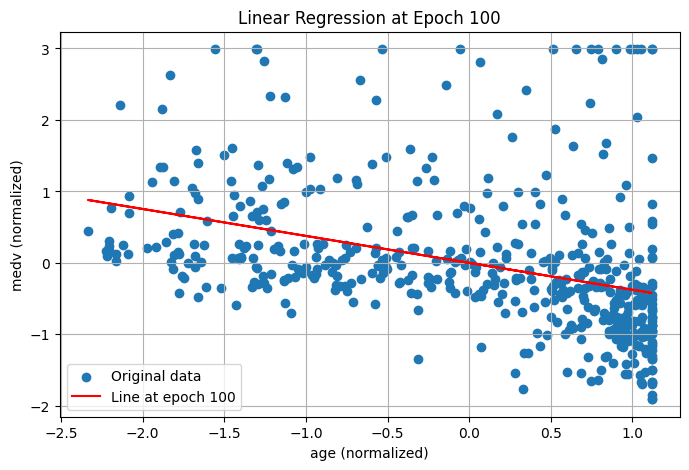

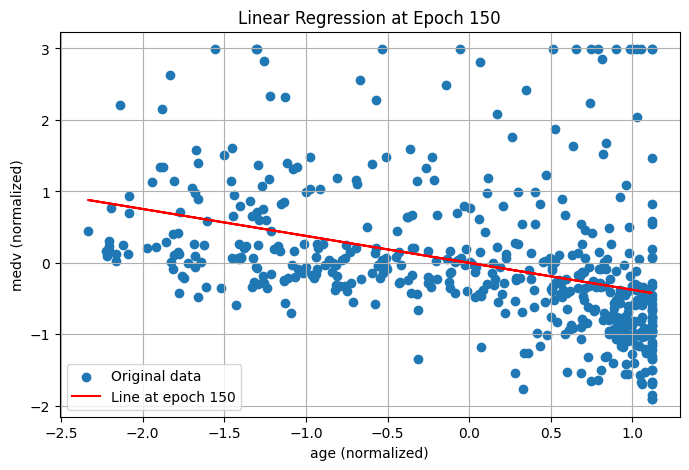

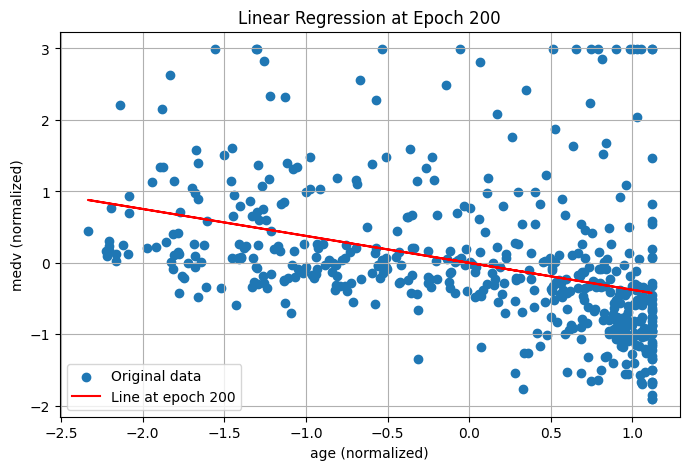

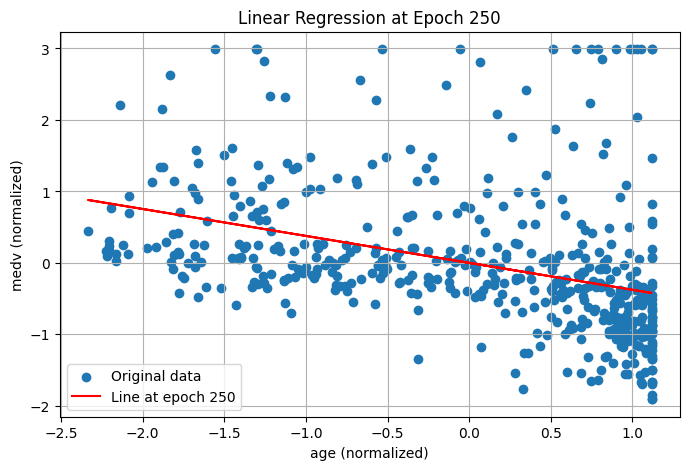

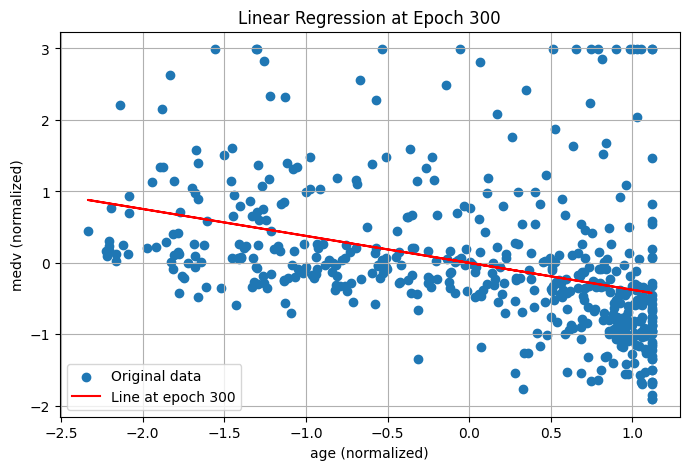

Final theta0: 0.0000, theta1: -0.3770


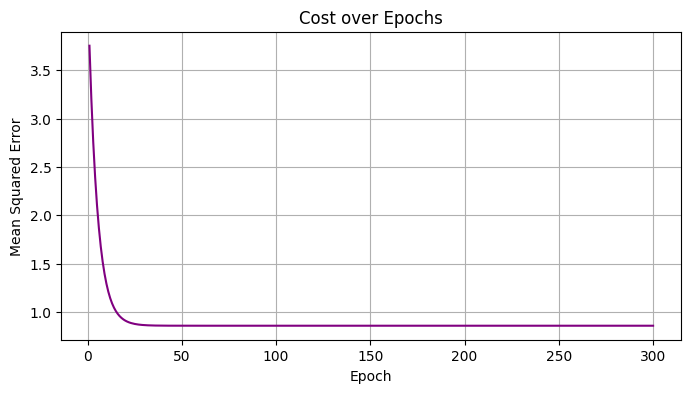

In [ ]:
alpha = 0.1
iterations = 300

# Initialize parameters
theta0 = 1.0
theta1 = 1.0

m = len(x)
cost_history = []

# Gradient Descent
for epoch in range(1, iterations + 1):
    # Predictions and errors
    y_pred = theta0 + theta1 * x
    error = y_pred - y

    # Cost (optional, for plotting later)
    cost = (1/m) * np.sum(error ** 2)
    cost_history.append(cost)

    # Gradient updates
    theta0 -= alpha * (1/m) * np.sum(error)
    theta1 -= alpha * (1/m) * np.sum(error * x)

    # Plot regression line every 50 epochs
    if epoch % 50 == 0:
        plt.figure(figsize=(8, 5))
        plt.scatter(x, y, label='Original data')
        plt.plot(x, theta1 * x + theta0, color='red', label=f'Line at epoch {epoch}')
        plt.title(f"Linear Regression at Epoch {epoch}")
        plt.xlabel("age (normalized)")
        plt.ylabel("medv (normalized)")
        plt.legend()
        plt.grid(True)
        plt.show()

# Final output
print(f"Final theta0: {theta0:.4f}, theta1: {theta1:.4f}")

# Optional: Plot cost function
plt.figure(figsize=(8, 4))
plt.plot(range(1, iterations + 1), cost_history, color='purple')
plt.title("Cost over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

In [ ]:
X = data[['age', 'rm', 'tax']]
y = data['medv']


X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = (y - np.mean(y)) / np.std(y)

X = X.to_numpy()
y = y.to_numpy().reshape(-1, 1)

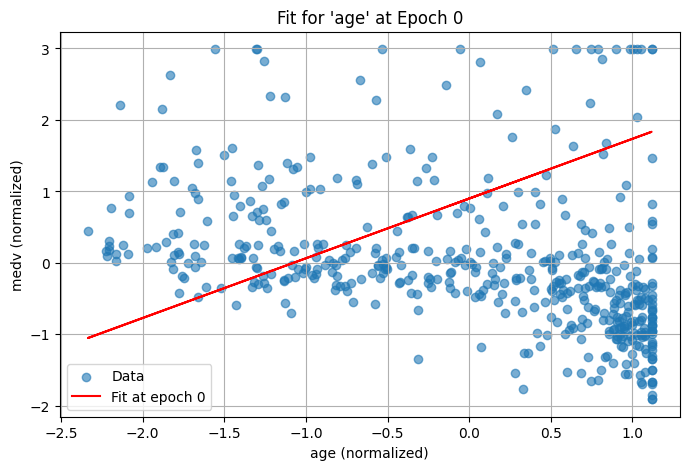

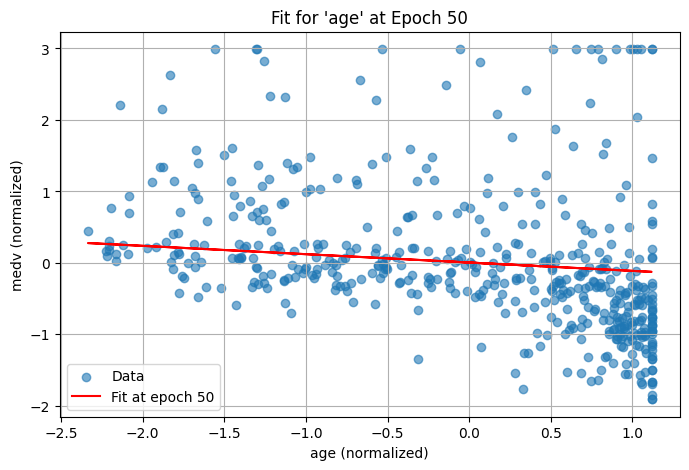

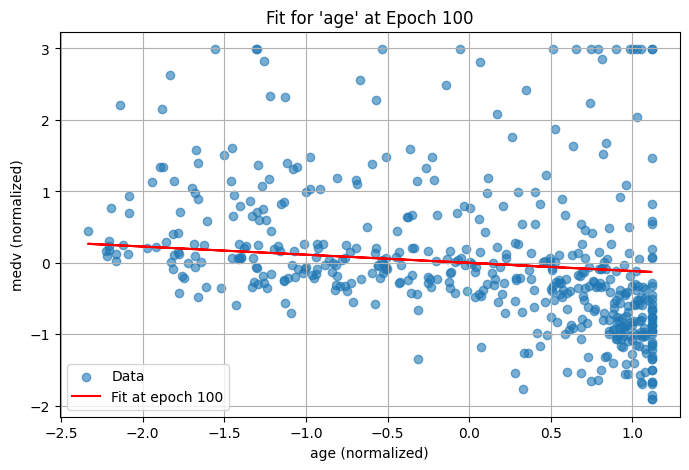

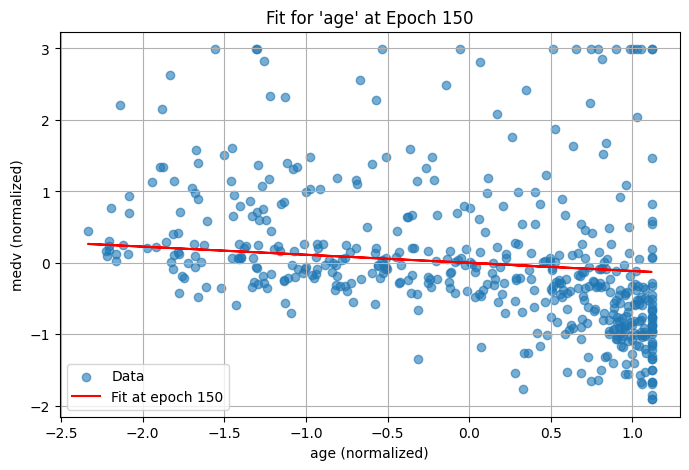

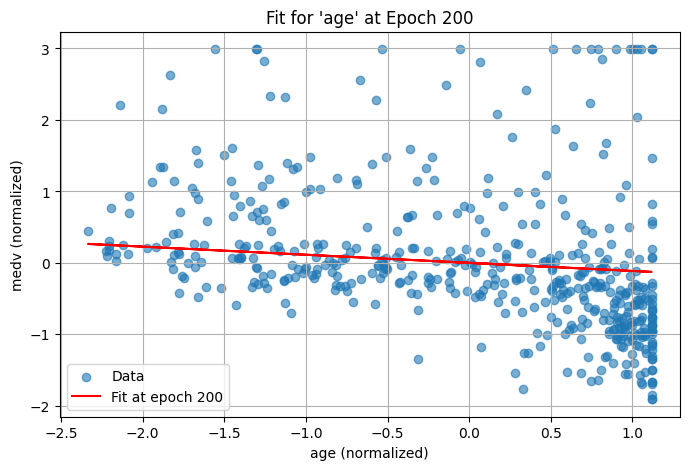

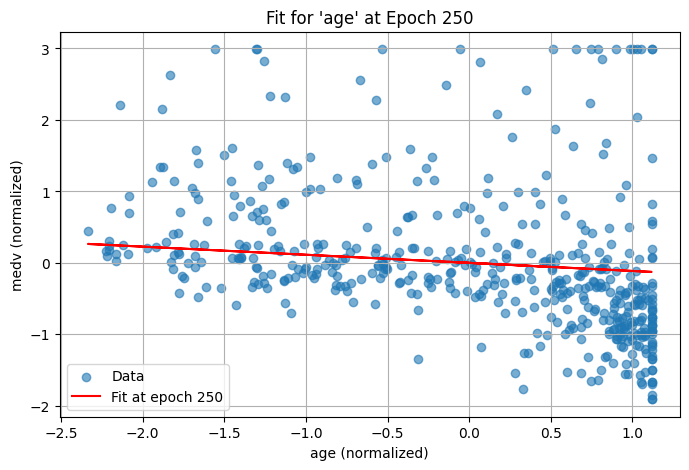

Final weights (theta):
Theta 0: 0.0000
Theta 1: -0.1134
Theta 2: 0.5992
Theta 3: -0.2361


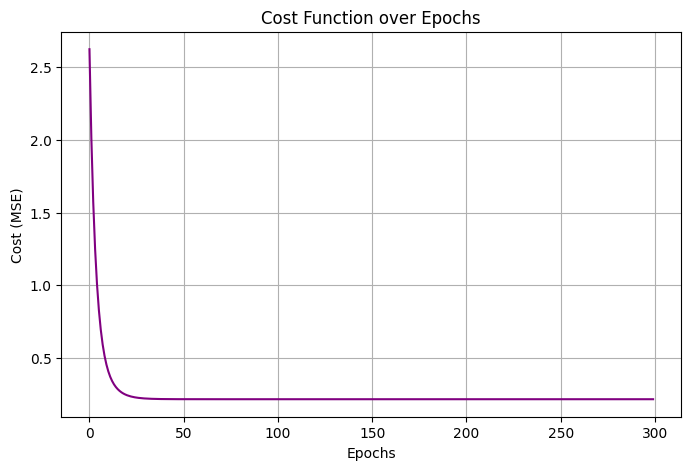

In [ ]:
# X = data[['age', 'rm', 'tax']]
# y = data['medv']

# # Normalize features and target
# X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# y = (y - np.mean(y)) / np.std(y)

# # Convert to numpy arrays
# X = X.to_numpy()
# y = y.to_numpy().reshape(-1, 1)

# Add bias (intercept) term
m = X.shape[0]
X = np.hstack([np.ones((m, 1)), X])  # shape (m, n+1)

# Initialize theta
theta = np.ones((X.shape[1], 1))  # shape (n+1, 1)

# Hyperparameters
alpha = 0.1
epochs = 300

# Cost history
cost_history = []

# Gradient descent loop
for epoch in range(epochs):
    # Prediction without @ or dot
    y_pred = np.sum(X * theta.T, axis=1, keepdims=True)  # shape (m, 1)
    error = y_pred - y                                    # shape (m, 1)

    # Compute cost (Mean Squared Error)
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    cost_history.append(cost)

    # Gradient without dot
    gradient = []
    for j in range(X.shape[1]):
        grad_j = (1/m) * np.sum(error.flatten() * X[:, j])
        gradient.append(grad_j)
    gradient = np.array(gradient).reshape(-1, 1)

    # Update weights
    theta = theta - alpha * gradient

    # Plot line for age feature only (index 1) at intervals
    if epoch % 50 == 0:
        age_feature = X[:, 1].reshape(-1, 1)  # normalized age
        line = theta[0] + theta[1] * age_feature

        plt.figure(figsize=(8, 5))
        plt.scatter(age_feature, y, label='Data', alpha=0.6)
        plt.plot(age_feature, line, color='red', label=f'Fit at epoch {epoch}')
        plt.title(f"Fit for 'age' at Epoch {epoch}")
        plt.xlabel("age (normalized)")
        plt.ylabel("medv (normalized)")
        plt.legend()
        plt.grid(True)
        plt.show()

# Final theta values
print("Final weights (theta):")
for i, val in enumerate(theta):
    print(f"Theta {i}: {val[0]:.4f}")

# Plot cost over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), cost_history, color='purple')
plt.title("Cost Function over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

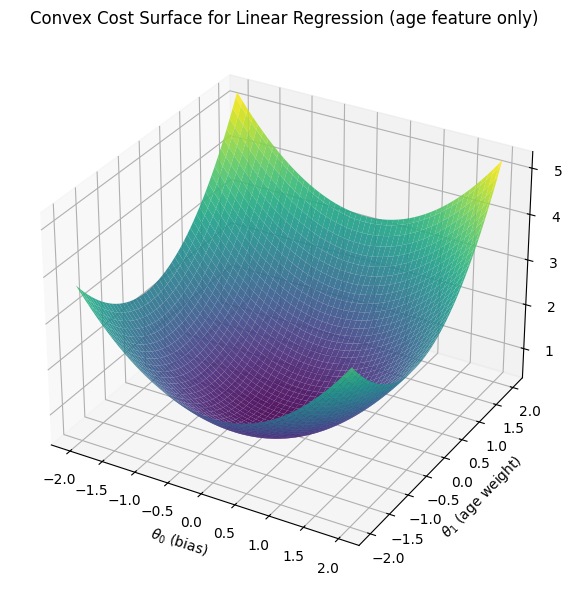

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Use only one feature: age (already normalized)
X_age = X[:, 1].reshape(-1, 1)  # only 'age'
X_age = np.hstack([np.ones((m, 1)), X_age])  # add bias

theta0_vals = np.linspace(-2, 2, 100)
theta1_vals = np.linspace(-2, 2, 100)

T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
cost_vals = np.zeros_like(T0)

# Compute cost for each (theta0, theta1)
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[T0[i, j]], [T1[i, j]]])  # shape (2, 1)
        preds = np.sum(X_age * t.T, axis=1, keepdims=True)  # shape (m, 1)
        error = preds - y
        cost_vals[i, j] = (1 / (2 * m)) * np.sum(error ** 2)

# Plot 3D convex cost surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, cost_vals, cmap='viridis', edgecolor='none', alpha=0.9)
ax.set_title('Convex Cost Surface for Linear Regression (age feature only)')
ax.set_xlabel(r'$\theta_0$ (bias)')
ax.set_ylabel(r'$\theta_1$ (age weight)')
ax.set_zlabel('Cost (MSE)')
plt.tight_layout()
plt.show()


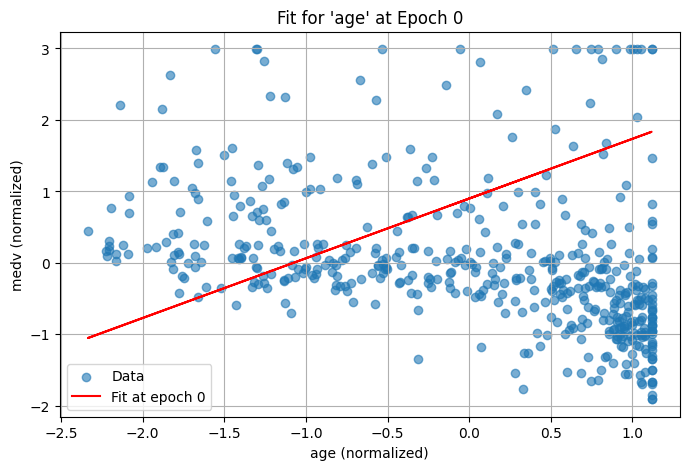

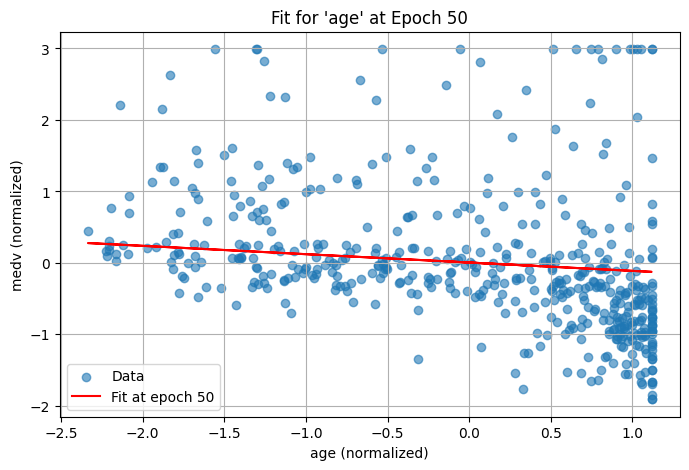

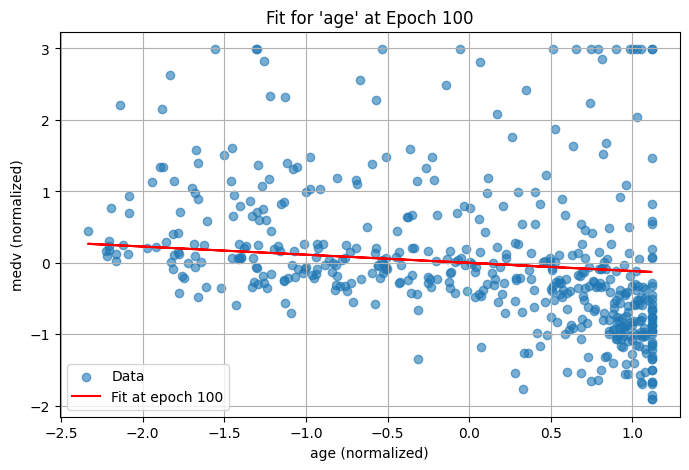

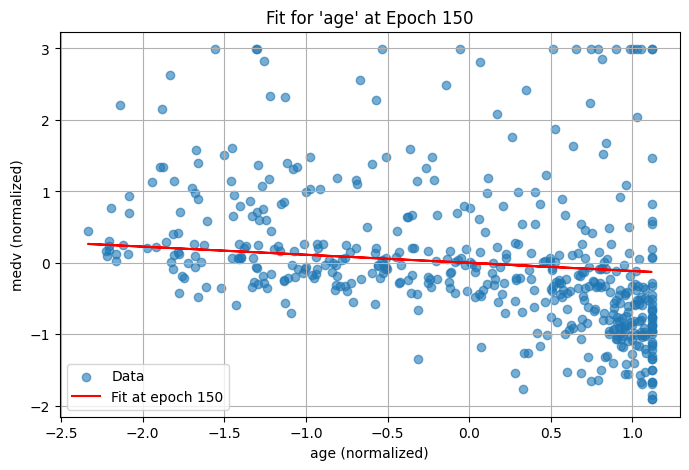

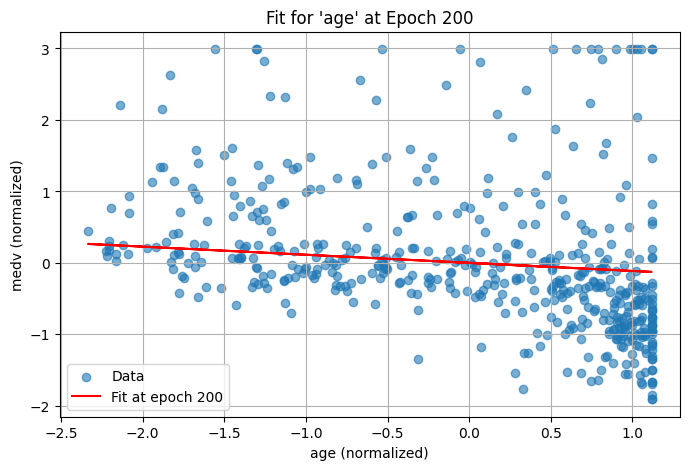

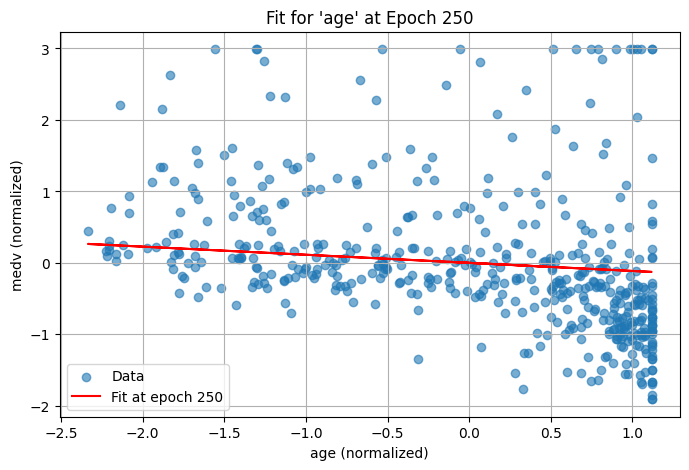

Final weights (theta):
Theta 0: 0.0000
Theta 1: -0.1134
Theta 2: 0.5992
Theta 3: -0.2361


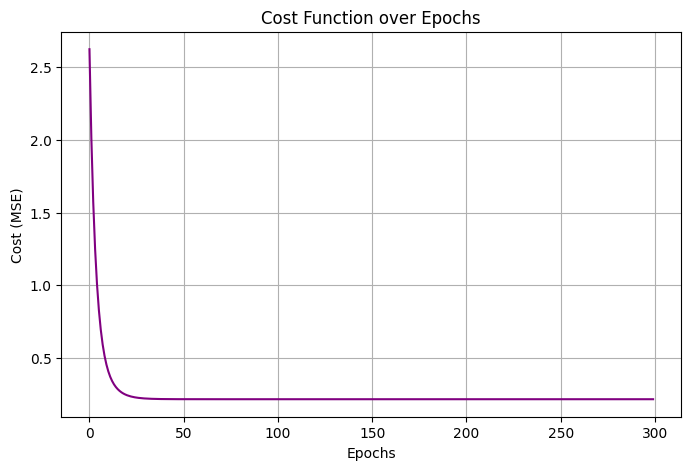

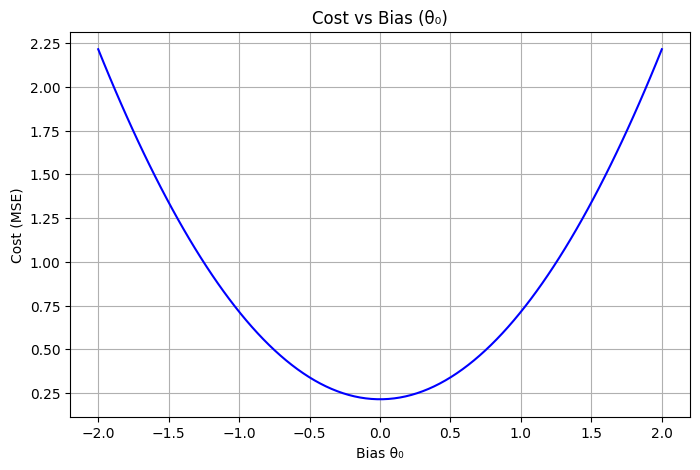

In [ ]:
# Load data (you already have this step done)
# Assuming `data` is your DataFrame already loaded
X = data[['age', 'rm', 'tax']]
y = data['medv']

# For demonstration, here's how you may define X and y if data is loaded
# Comment these two lines if you already have them
X = data[['age', 'rm', 'tax']]
y = data['medv']

# Normalize features and target
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = (y - np.mean(y)) / np.std(y)

# Convert to numpy arrays
X = X.to_numpy()
y = y.to_numpy().reshape(-1, 1)

# Add bias (intercept) term
m = X.shape[0]
X = np.hstack([np.ones((m, 1)), X])  # shape (m, n+1)

# Initialize theta
theta = np.ones((X.shape[1], 1))  # shape (n+1, 1)

# Hyperparameters
alpha = 0.1
epochs = 300

# Cost history
cost_history = []

# Gradient descent loop
for epoch in range(epochs):
    # Prediction without @ or dot
    y_pred = np.sum(X * theta.T, axis=1, keepdims=True)  # shape (m, 1)
    error = y_pred - y                                    # shape (m, 1)

    # Compute cost (Mean Squared Error)
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    cost_history.append(cost)

    # Compute gradient manually
    gradient = []
    for j in range(X.shape[1]):
        grad_j = (1 / m) * np.sum(error.flatten() * X[:, j])
        gradient.append(grad_j)
    gradient = np.array(gradient).reshape(-1, 1)

    # Update weights
    theta = theta - alpha * gradient

    # Optional: Plot line for 'age' feature only
    if epoch % 50 == 0:
        age_feature = X[:, 1].reshape(-1, 1)  # normalized age
        line = theta[0] + theta[1] * age_feature

        plt.figure(figsize=(8, 5))
        plt.scatter(age_feature, y, label='Data', alpha=0.6)
        plt.plot(age_feature, line, color='red', label=f'Fit at epoch {epoch}')
        plt.title(f"Fit for 'age' at Epoch {epoch}")
        plt.xlabel("age (normalized)")
        plt.ylabel("medv (normalized)")
        plt.legend()
        plt.grid(True)
        plt.show()

# Final weights
print("Final weights (theta):")
for i, val in enumerate(theta):
    print(f"Theta {i}: {val[0]:.4f}")

# Plot cost over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), cost_history, color='purple')
plt.title("Cost Function over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

# --------------------------------------------
# Cost vs Bias (Theta 0)
# --------------------------------------------
theta_range = np.linspace(theta[0] - 2, theta[0] + 2, 100)
costs = []

for t0 in theta_range:
    temp_theta = theta.copy()
    temp_theta[0] = t0
    y_pred = np.sum(X * temp_theta.T, axis=1, keepdims=True)
    error = y_pred - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    costs.append(cost)

plt.figure(figsize=(8, 5))
plt.plot(theta_range, costs, color='blue')
plt.title("Cost vs Bias (θ₀)")
plt.xlabel("Bias θ₀")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

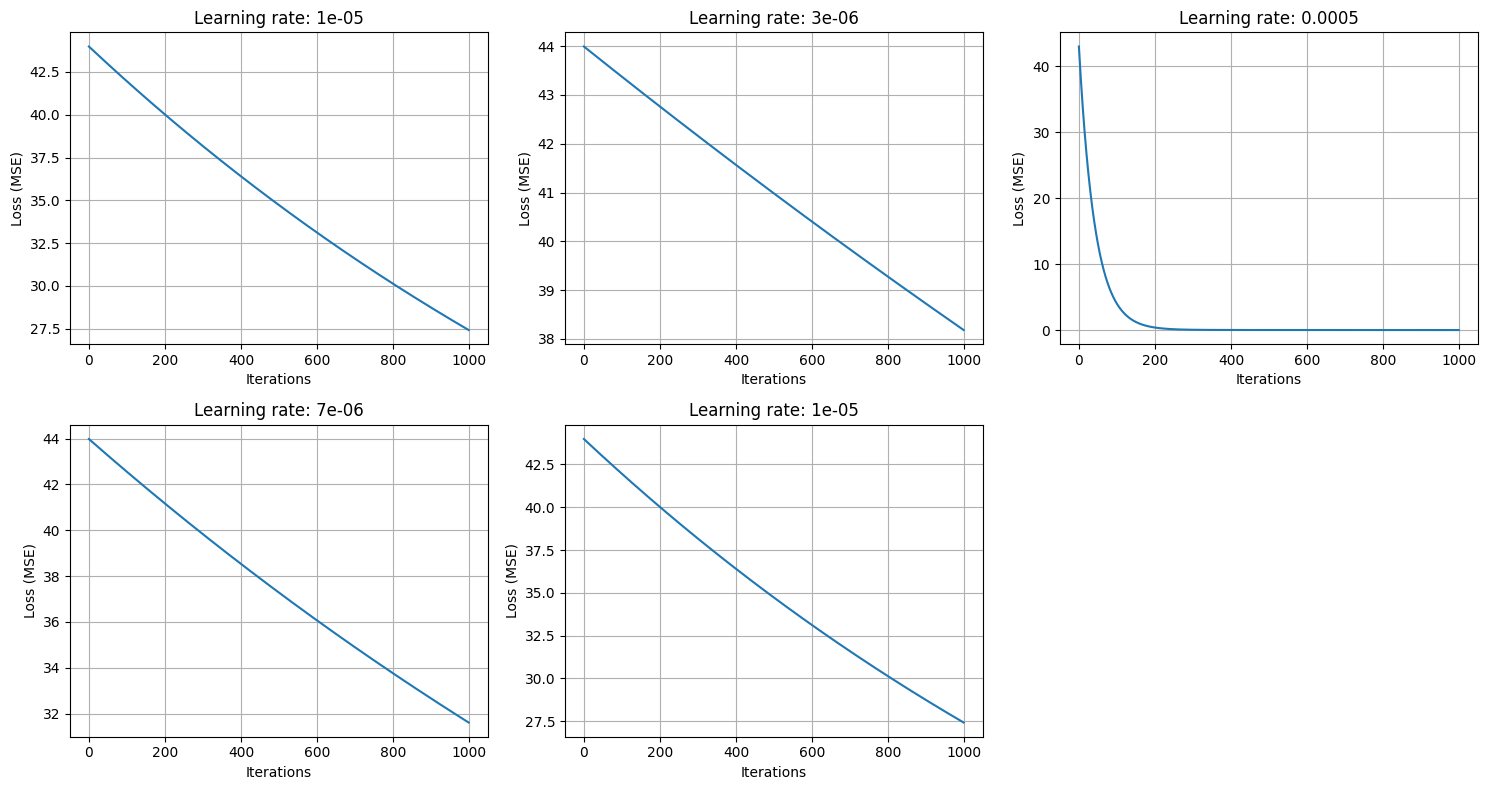

In [ ]:
# import matplotlib.pyplot as plt

# # Example data
# x = [1, 2, 3, 4, 5]
# y = [2, 4, 6, 8, 10]

# learning_rates = [0.00001, 0.000003, 0.0005, 0.000007, 0.00001]
# max_iterations = 1000

# losses_dict = {}

# for alpha in learning_rates:
#     m = 0
#     b = 0
#     n = len(x)
#     losses = []

#     for iteration in range(max_iterations):
#         dm = 0
#         db = 0
#         for i in range(n):
#             y_pred = m * x[i] + b
#             error = y_pred - y[i]
#             dm += error * x[i]
#             db += error

#         dm = (2 / n) * dm
#         db = (2 / n) * db

#         m = m - alpha * dm
#         b = b - alpha * db

#         loss = sum((m * x[i] + b - y[i]) ** 2 for i in range(n)) / n
#         losses.append(loss)

#     losses_dict[alpha] = losses

# # Arrange plots in a 2x3 grid (as you have 5 learning rates)
# fig, axs = plt.subplots(2, 3, figsize=(15, 8))
# axs = axs.flatten()

# for i, alpha in enumerate(learning_rates):
#     axs[i].plot(range(max_iterations), losses_dict[alpha])
#     axs[i].set_title(f"Learning rate: {alpha}")
#     axs[i].set_xlabel("Iterations")
#     axs[i].set_ylabel("Loss (MSE)")
#     axs[i].grid(True)

# # Remove empty subplot if any
# if len(learning_rates) < len(axs):
#     for j in range(len(learning_rates), len(axs)):
#         fig.delaxes(axs[j])

# plt.tight_layout()
# plt.show()


Learning rate 1e-05: Stopped due to max iterations.

Learning Rate: 1e-05
Converged in 1000 iterations
Final equation: price = 0.39 * area + 0.11
Learning rate 3e-06: Stopped due to max iterations.

Learning Rate: 3e-06
Converged in 1000 iterations
Final equation: price = 0.13 * area + 0.03
Learning rate 0.0005: Stopped due to max iterations.

Learning Rate: 0.0005
Converged in 1000 iterations
Final equation: price = 1.88 * area + 0.43
Learning rate 7e-06: Stopped due to max iterations.

Learning Rate: 7e-06
Converged in 1000 iterations
Final equation: price = 0.28 * area + 0.08
Learning rate 1e-05: Stopped due to max iterations.

Learning Rate: 1e-05
Converged in 1000 iterations
Final equation: price = 0.39 * area + 0.11


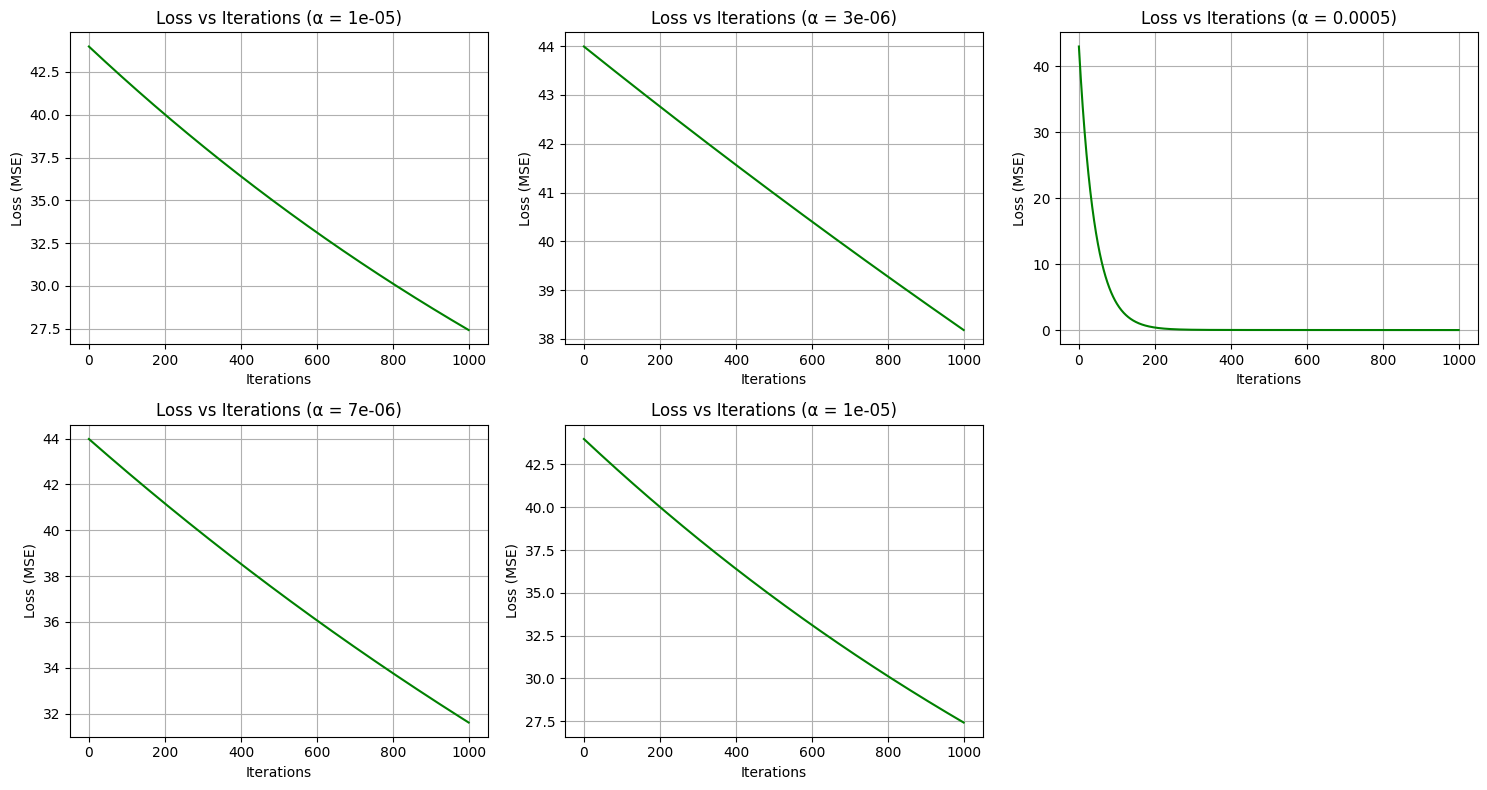

Learning rate 1e-05: Stopped due to max iterations.
Learning rate 3e-06: Stopped due to max iterations.
Learning rate 0.0005: Stopped due to max iterations.
Learning rate 7e-06: Stopped due to max iterations.
Learning rate 1e-05: Stopped due to max iterations.


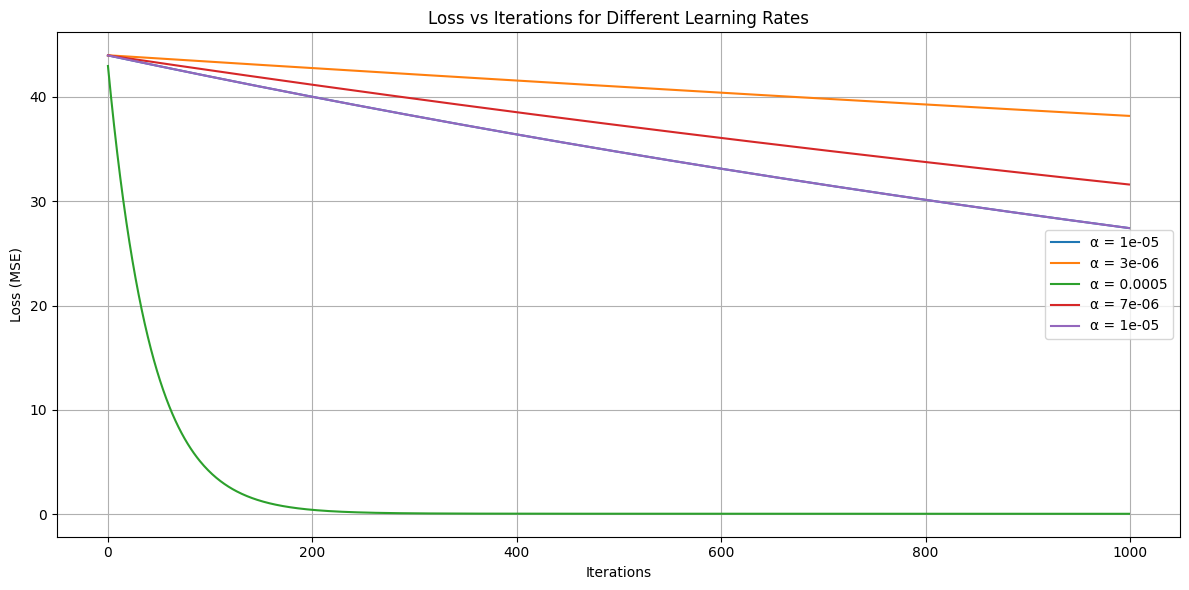

In [ ]:
# import matplotlib.pyplot as plt

# # Example data
# x = [1, 2, 3, 4, 5]
# y = [2, 4, 6, 8, 10]

# learning_rates = [0.00001, 0.000003, 0.0005, 0.000007, 0.00001]

# # --- GRID OF LOSSES ---
# fig, axs = plt.subplots(2, 3, figsize=(15, 8))
# axs = axs.flatten()

# for idx, alpha in enumerate(learning_rates):
#     m = 0
#     b = 0
#     n = len(x)
#     threshold = 0.00001
#     prev_loss = float('inf')
#     max_iterations = 1000
#     iteration = 0
#     losses = []

#     while True:
#         dm = 0
#         db = 0
#         for i in range(n):
#             y_pred = m * x[i] + b
#             error = y_pred - y[i]
#             dm += error * x[i]
#             db += error

#         dm = (2 / n) * dm
#         db = (2 / n) * db

#         m = m - alpha * dm
#         b = b - alpha * db

#         loss = sum((m * x[i] + b - y[i]) ** 2 for i in range(n)) / n
#         losses.append(loss)

#         if abs(prev_loss - loss) < threshold:
#             # break

#         prev_loss = loss
#         iteration += 1
#         if iteration >= max_iterations:
#             print(f"Learning rate {alpha}: Stopped due to max iterations.")
#             break

#     # Plot each curve in its own grid cell
#     axs[idx].plot(range(len(losses)), losses, color='green')
#     axs[idx].set_title(f"Loss vs Iterations (α = {alpha})")
#     axs[idx].set_xlabel("Iterations")
#     axs[idx].set_ylabel("Loss (MSE)")
#     axs[idx].grid(True)

#     # Print result to console
#     print(f"\nLearning Rate: {alpha}")
#     print(f"Converged in {iteration} iterations")
#     # print(f"Final equation: price = {m:.2f} * area + {b:.2f}")

# # Remove any unused subplots
# if len(learning_rates) < len(axs):
#     for j in range(len(learning_rates), len(axs)):
#         fig.delaxes(axs[j])

# plt.tight_layout()
# plt.show()

# # --- Combined Loss Graph ---
# plt.figure(figsize=(12, 6))
# for alpha in learning_rates:
#     m = 0
#     b = 0
#     # n = len(x)
#     threshold = 0.00001
#     prev_loss = float('inf')
#     max_iterations = 1000
#     iteration = 0
#     losses = []

#     while True:
#         dm = 0
#         db = 0
#         for i in range(n):
#             y_pred = m * x[i] + b
#             error = y_pred - y[i]
#             dm += error * x[i]
#             db += error

#         dm = (2 / n) * dm
#         db = (2 / n) * db

#         m = m - alpha * dm
#         b = b - alpha * db

#         loss = sum((m * x[i] + b - y[i]) ** 2 for i in range(n)) / n
#         losses.append(loss)

#         if abs(prev_loss - loss) < threshold:
#             break

#         prev_loss = loss
#         iteration += 1
#         if iteration >= max_iterations:
#             print(f"Learning rate {alpha}: Stopped due to max iterations.")
#             break

#     plt.plot(range(len(losses)), losses, label=f"α = {alpha}")

# plt.title("Loss vs Iterations for Different Learning Rates")
# plt.xlabel("Iterations")
# plt.ylabel("Loss (MSE)")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()
